# Hand Digit Classsification (Neural Network)

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
print(tf.__version__)

2.10.0


In [4]:
(X_train, Y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train = X_train / 255
x_test = x_test / 255

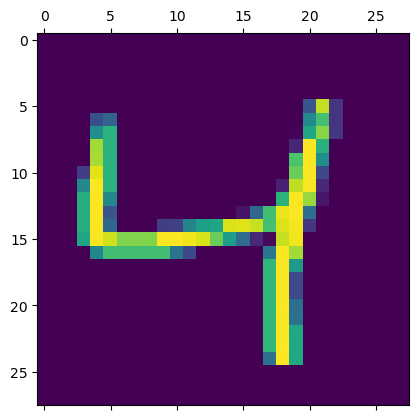

In [6]:
plt.matshow(X_train[2])

In [7]:
X_train_flatten = X_train.reshape(len(X_train), len(X_train[0])**2)
X_train_flatten.shape
x_test_flatten = x_test.reshape(len(x_test), len(x_test[0])**2)
x_test_flatten.shape

(10000, 784)

In [8]:
len(X_train_flatten[0])

784

### Model without Hidden Layer

In [9]:
model = Sequential([
    Dense(10, input_shape = (784,), activation='softmax')
])

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4718 - accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9143
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [11]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9277


[0.2641637325286865, 0.9276999831199646]

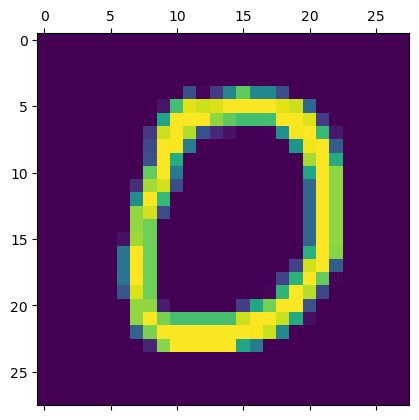

In [12]:
plt.matshow(x_test[10])

In [13]:
Y_predict = model. predict(x_test_flatten)
np.argmax(Y_predict[10])

313/313 [==============================] - 1s 2ms/step


0

In [14]:
from tensorflow.math import confusion_matrix

In [15]:
cm = confusion_matrix(labels = y_test, predictions = [np.argmax(i) for i in Y_predict])
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    8,    4,    1,    0],
       [   0, 1106,    5,    2,    0,    1,    4,    2,   15,    0],
       [   4,    8,  939,   13,    9,    3,   13,    8,   31,    4],
       [   2,    0,   27,  909,    1,   28,    3,   11,   22,    7],
       [   1,    1,    7,    1,  917,    0,   10,    4,   10,   31],
       [   9,    2,    4,   34,   10,  769,   17,    9,   33,    5],
       [   7,    3,    9,    1,    7,    8,  920,    2,    1,    0],
       [   1,    6,   25,    2,    8,    0,    0,  957,    2,   27],
       [   5,    6,    8,   18,    9,   18,    9,   12,  882,    7],
       [  10,    8,    1,    9,   23,    5,    0,   26,    7,  920]])>

Text(70.72222222222221, 0.5, 'Truth')

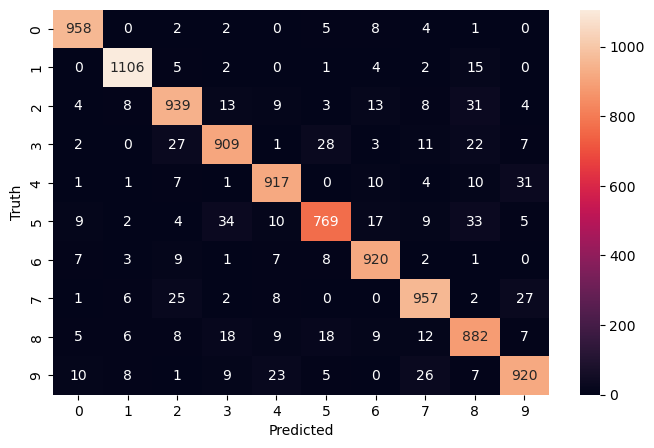

In [16]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model with Hidden Layer

In [35]:
model2 = Sequential([
    Dense(100, input_shape = (784,), activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flatten, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2742 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1250 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0858 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0514 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

313/313 [==============================] - 0s 1ms/step


Text(70.72222222222221, 0.5, 'Truth')

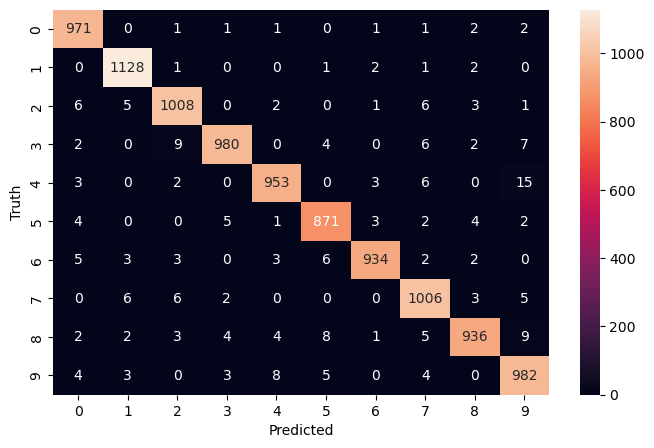

In [36]:
Y_predict2 = model. predict(x_test_flatten)
cm2 = confusion_matrix(labels = y_test, predictions = [np.argmax(i) for i in Y_predict2])

import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
from keras.layers import Flatten

In [38]:
model3 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(100, input_shape = (784,), activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model3.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2689 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1237 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0854 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0332 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0285 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.018

#### Achieved 99.3 % Accuracy